# Deep learning fundamentals

- Introduction of basic AI concepts and fundamentals
- Introduction of deep learning and neural network
- Classic minist example

## What is artificial intelligence

intelligence: the capability to learn and solve

artificial intelligence: the simulation of human intelligence by machines

```
input -> processing -> output
```

### Branches

- Computer Vision
- NLP
- Robotics
- Machine Learning
- Pattern recognition, data mining, human-computer interaction...


### Machine learning vs Deep learning

#### Machine learning

一种实现人工智能的方法：通过从数据中学习模式和规律来进行预测和决策的方法

Minimal example：从小明的每月收入，求出一个函数，就可以给出之后的收入的预测。

人脑同样按照类似的逻辑运作，一支稳定上涨的股票，人们往往倾向于继续认为它能保持上涨的趋势。

机器学习的基本框架：将**训练数据**喂给计算机，计算机自动求解出数据的函数关系，然后就可以在新的数据上做出预测或者建议

#### 主要分类

- Supervised Learning
  - Facial recognition
  - Translate
  - Medical diagnose
- Unsupervised Learning
  - News clustering
- Semi-supervised Learning
- Reinforcement Learning
  - AlphaGo


#### Deep learning 

一种实现深度学习的技术：利用深度神经网络对数据进行建模和学习

模仿人类神经网络，建立模型


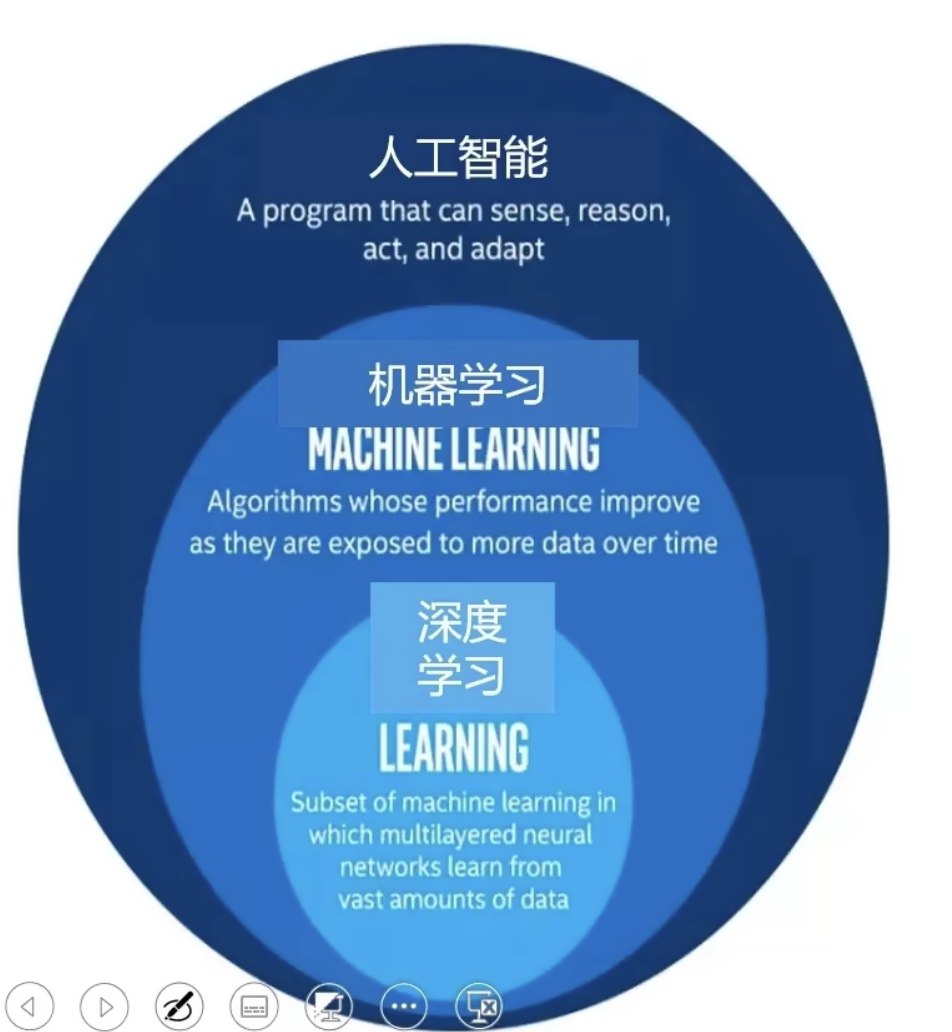

### How it works

从最简单的一个问题开始，对数据进行**分类**：

|城市|小区|房价（万）|面积|
|---|---|---|---|
|北京| A |650|80|
|北京| B |780|70|
|北京| C |950|68|
|鹤岗| D |10|89|
|鹤岗| E |15|89|
|鹤岗| F |12|80|


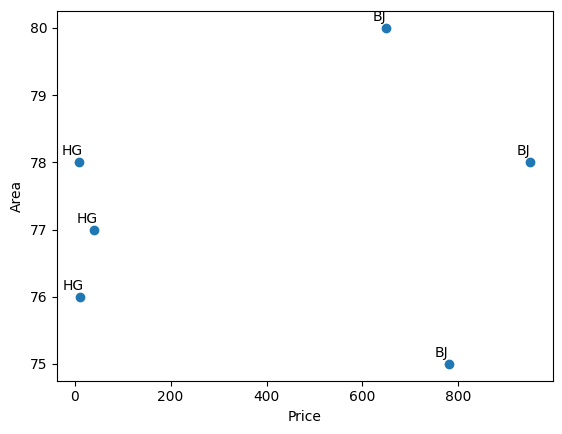

In [29]:
import matplotlib.pyplot as plt

# 数据
cities = ['BJ', 'BJ', 'BJ', 'HG', 'HG', 'HG']
prices = [650, 780, 950, 10, 40, 12]
areas = [80, 75, 78, 78, 77, 76]

# 创建散点图
plt.scatter(prices, areas)

# 添加标签
for i in range(len(cities)):
    plt.annotate(cities[i], (prices[i], areas[i]), textcoords="offset points", xytext=(-5,5), ha='center')

# 设置坐标轴标签
plt.xlabel('Price')
plt.ylabel('Area')

# 显示图表
plt.show()

常见的机器学习问题:

- 分类问题：将输入样本划分为不同的类别或标签
- 回归问题：预测一个连续数值输出
- 聚类问题：将相似的样本分组到一起，形成不同的簇或类别
- 异常检测：指识别数据中的异常或极端值
...

机器学习，就是通过训练数据，找到那个最合适的函数来描述已有数据的规律。数据，是机器学习的命根子，从数据中发现模式，就是机器学习要做的事情。


数据一般分为：

- 训练数据
- 测试数据

将训练和测试数据分开，主要是为了追求模型的泛化能力（也就是处理未知的数据的能力），如果仅有一个数据集去学习和评估，可能会导致可以顺利处理某个数据集，但无法处理其他数据集，这种对某一个数据集过度拟合的状态也叫**过拟合（over fitting）**，如何避免过拟合也是机器学习的一个重要课题。

## 神经网络

### 感知机（Perceptron）

感知机的接受多个输入信号，输出一个信号，只有 0 和 1 两种值


- 输入
- 权重
- 阈值
- 输出

#### 与门

|x1| x2 | y |
|---|---|---|
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

只需要调整权重和阈值，我们就可以实现其他的 或门，与非门等。这里我们手动指定来参数的值，而机器学习就是将这个决定参数的工作交由计算机自动从数据中完成。

学习，或者说训练，是确定合适参数的过程，而人要做的，则是思考感知机的构造（模型），并把训练数据交给计算机。

In [30]:
def AND(x1, x2):
    # weight 和 阈值（也叫偏置 Bias）
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


权重，是控制输入信号重要性的参数。

偏置，是调整神经元被激活的容易程度。

为了后续统一，我们把公式统一成这样：`b + w1*x1 + w2*x2`，

如果输入信号和参数增多，可以使用 numpy 来简化代码

In [31]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))


(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


### 与非门

|x1| x2 | y |
|---|---|---|
| 0 | 0 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

In [45]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### 或门

|x1| x2 | y |
|---|---|---|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |

In [46]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


### 异或门

仅当一方为 1，才会输出 1

|x1| x2 | y |
|---|---|---|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

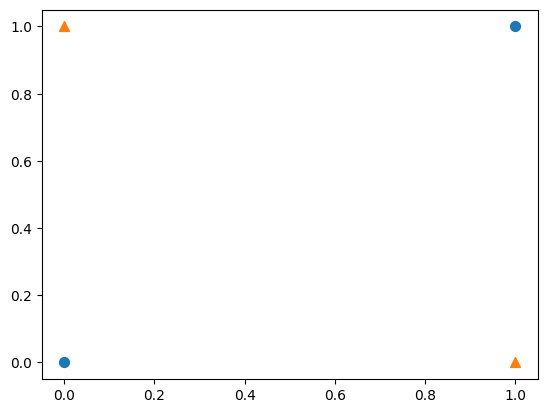

In [43]:
import matplotlib.pyplot as plt

x = [0, 0, 1, 1]
y = [0, 1, 0, 1]

fig, ax = plt.subplots()
ax.scatter([0, 1], [0, 1], marker='o', s=50)
ax.scatter([0, 1], [1, 0], marker='^', s=50)
plt.show()

上面这个图无法一条直线分隔出三角形和圆，只有用曲线才可以。

线性和非线性

In [54]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


多层感知机

## 从感知机到神经网络

https://playground.tensorflow.org/


- 输入层
- 隐藏层
- 输出层

### 激活函数

为了将前面的感知机中的分情况的动作表示出来，我们再引入一个新的 `h(x)`，这样感知机就可以表示成这样：

```
y = h(b + w1*x1 + w2*x2)
```

这个 h 就是激活函数 (activation function)

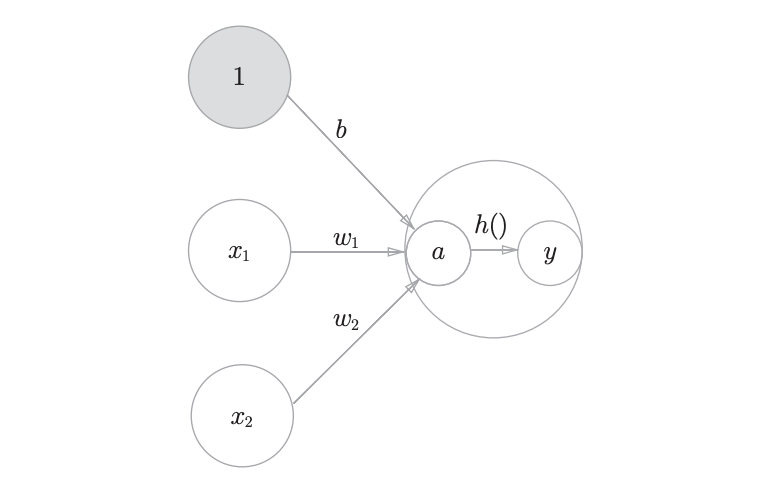

感知机使用的激活函数，输出要么是 1，要么是 0，所以也叫阶跃函数（step function）

```js
function step(x) {
  return x > 0 ? 1 : 0;
}

```

如果把这个函数换成其他的，那么就开始进入真正的神经网络的世界了！

### sigmoid 函数

```python
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 
```

两者的比较：

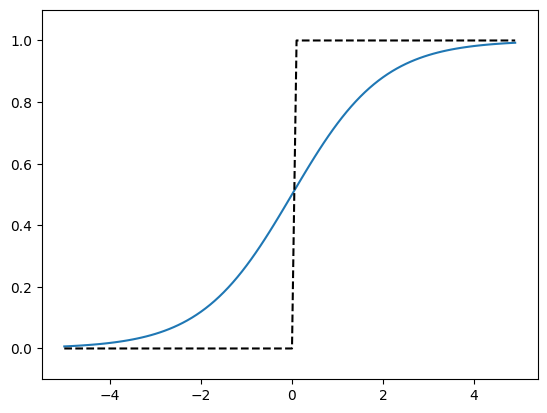

In [58]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #指定图中绘制的y轴的范围
plt.show()


这些激活函数他们都是非线性函数。

那么神经网络能使用线性函数吗？

### ReLu 函数

Rectified Linear Unit

输入大于 0 时，直接输出该值，小于等于 0 时则输出 0。

```js
function relu(x) {
  return Math.max(x, 0)
}
```

#### 特点

- 非线性
- 稀疏激活性：只有部分神经元会被激活，其他神经元被抑制
- 梯度稳定：在正区间上梯度保持稳定
- 计算效率高

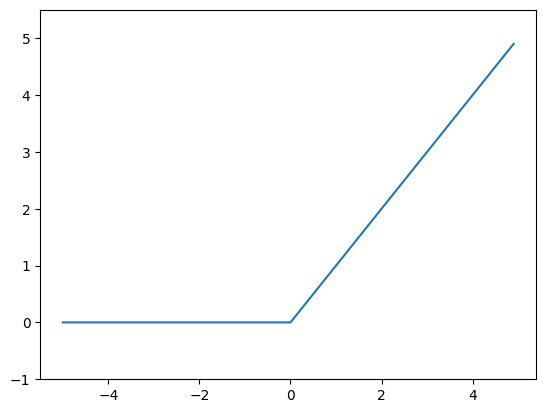

In [59]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


## 多维数组运算

通过 numpy 多维数组运算，就可以很方便的实现神经网络

In [65]:
import numpy as np

A = np.array([1, 2, 3, 4])
B = np.array([[1,2], [3,4], [5,6]])

print("dimension of A:", np.ndim(A))
print("dimension of B:", np.ndim(B))

print("shape of A:", A.shape)
print("shape of B:", B.shape)

dimension of A: 1
dimension of B: 2
shape of A: (4,)
shape of B: (3, 2)


### 矩阵（matrix）

二维数组也称为矩阵


#### 矩阵乘法

矩阵的乘积是通过左边矩阵的行（横向）和右边矩阵的列（纵向）以对应元素的方式相乘后再求和而得到的。

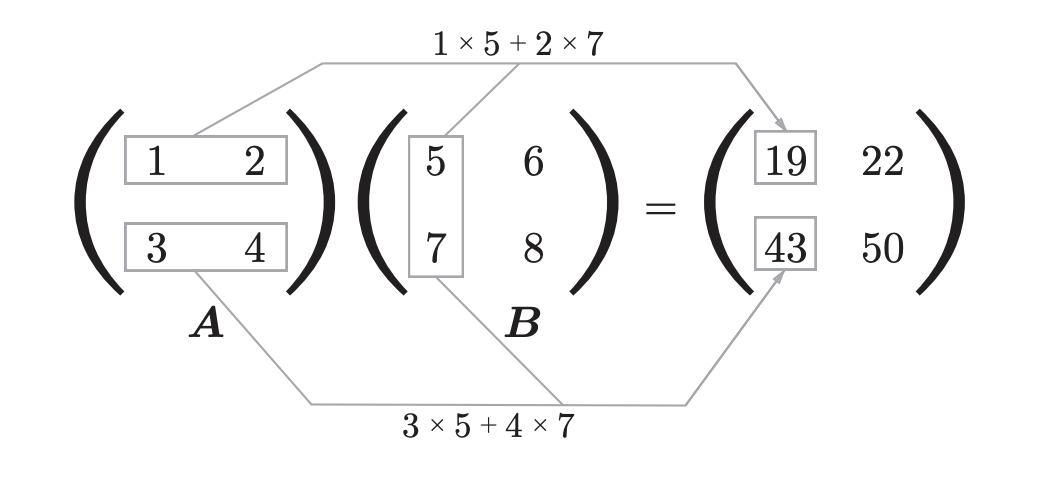

In [66]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

需要注意矩阵的形状（shape）。具体地讲，矩阵A的第1维的元素个数（列数）必须和矩阵B的第0维的元素个数（行数）相等

In [67]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])

# [
#   [1*1 + 2*3 + 3*5 = 22, 1*2 + 2*4 + 3*6 = 28],
#   [4*1 + 5*3 + 6*5 = 49, 4*2 + 5*4 + 6*6 = 64],
# ]
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [68]:
# A 和 B 交换位置的话结果会完全不一样
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [70]:
# 1, 2  *  7
# 3，4,    8
# 5, 6
A = np.array([[1,2], [3, 4], [5,6]])
B = np.array([7,8])

# 结果是什么？
np.dot(A, B)

array([23, 53, 83])

用矩阵运算来表示下面的神经网络

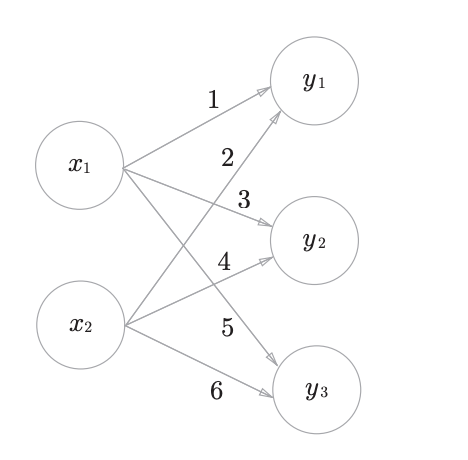

In [73]:

def network(x1, x2):
  X = np.array([x1, x2])
  W = np.array([[1,3,5], [2,4,6]])
  Y = np.dot(X, W)
  return Y

print(network(1, 2))

[ 5 11 17]


### 3 层神经网络的实现

这个推理处理也称为神经网络的前向传播（forward propagation）。

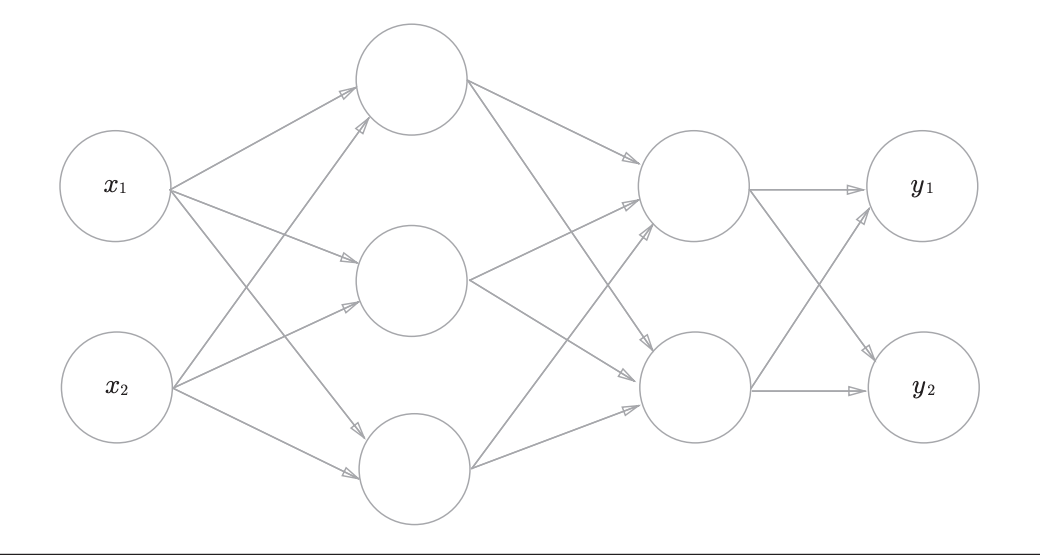

In [74]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])

  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])

  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = a3
  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## MNIST

手写数字图像集。MNIST是机器学习领域最经典的数据集之一。

- MNIST数据集是由0到9的数字图像构成。
- 训练图像有6万张
- 测试图像有1万张
- 28像素 × 28像素的灰度图像，各个像素的取值在0到255之间

In [75]:
import numpy as np
from PIL import Image
from dataset.mnist import load_mnist

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# 读入的图像是以一列（一维）NumPy数组的形式 flatten=True
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


## 神经网络的训练

### 损失函数 loss function

为了能顺利进行神经网络的学习，我们需要引入指标来进行判断。

以损失函数为基准，找出使它的值达到最小的权重参数，就是神经网络学习的目标。

这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

### 均方误差

计算神经网络的输出和正确解监督数据的各个元素之差的平方，再求总和，公式如下：

```py
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)
```

In [78]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

# 设“2”为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# “2”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003


In [79]:
# 假设“7”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.5975


### 梯度下降 gradient descent

#### 导数 derivative

导数用来描述一个函数的变化率。

如果一列火车每秒钟移动的距离越来越多，那么导数就是正数；如果火车每秒钟移动的距离越来越少，那么导数就是负数。如果火车每秒钟都移动相同的距离，那么导数就是0。所以，导数可以告诉我们一个函数在某一点上的变化趋势。

假如你是全程马拉松选手，在开始的10分钟内跑了2千米。如果要计算此时的奔跑速度，则为2/10 = 0.2［千米/分］。也就是说，你以1分钟前进0.2千米的速度（变化）奔跑。

不过，这个计算方式，严格地讲，计算的是10分钟内的平均速度。

而导数表示的是某个瞬间的变化量。因此，将10分钟这一时间段尽可能地缩短，比如计算前1分钟奔跑的距离、前1秒钟奔跑的距离、前0.1秒钟奔跑的距离……这样就可以获得某个瞬间的变化量（某个瞬时速度）。

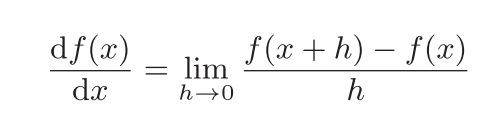

左边表示f（x）关于x的导数，即f（x）相对于x的变化程度。

右边表示 x 的“微小变化”将导致函数f（x）的值在多大程度上发生变化。

### 简单实现

```py
# 来自数值微分的英文 numerical differentiation，所谓数值微分就是用数值方法近似求解函数的导数的过程
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h) - f(x)) / h
```

### 问题

- h 取值问题，如果太小了计算机无法精确表示
- “真的导数”对应函数在x处的斜率（称为切线），但上述实现中计算的导数对应的是(x + h)和x之间的斜率（这个差异的出现是因为h不可能无限接近0）

为了减小这个误差，我们可以计算函数f在(x + h)和(x − h)之间的差分，这也叫**中心差分**，而(x + h)和x之间的差分称为**前向差分**

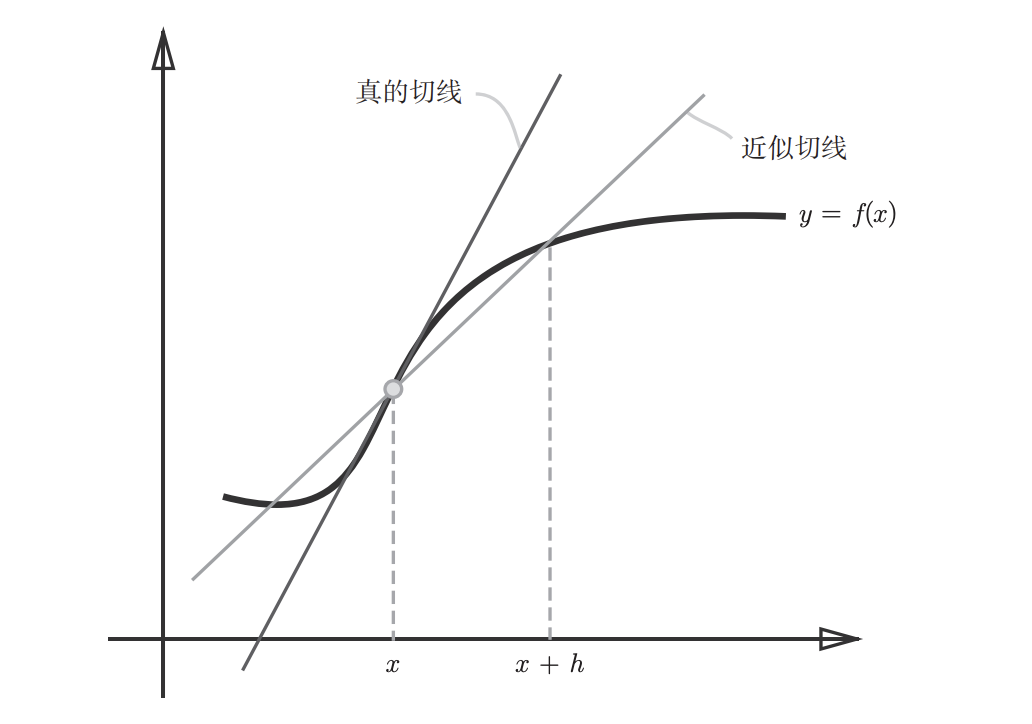

严格意义上并不一致，但误差非常小

In [82]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

### 偏导数

In [85]:
def function_2(x):
  return x[0]**2 + x[1]**2



上面这个函数有两个变量，所以有必要区分对哪个变量求导数。有多个变量的函数的导数称为**偏导数**

偏导数和单变量的导数一样，都是求某个地方的斜率。不过，偏导数需要将多个变量中的某一个变量定为目标变量，并将其他变量固定为某个值。

In [83]:
# 求x0 = 3, x1 = 4时，关于 x0 的偏导数
def function_tmp1(x0):
  return x0**2 + 4**2

numerical_diff(function_tmp1, 3)

6.00000000000378

In [84]:
# 求x0 = 3, x1 = 4时，关于 x1 的偏导数
def function_tmp2(x1):
  return 3**2 + x1**2

numerical_diff(function_tmp2, 4)

7.999999999999119

## 梯度（gradient）

由全部变量的偏导数汇总而成的向量称为梯度（gradient）。

上面的例子，x0 = 3, x1 = 4时，梯度为 `(6.00000000000378, 7.999999999999119)`

In [101]:
def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # 生成和x形状相同的数组
  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h)的计算
    x[idx] = tmp_val + h
    fxh1 = f(x)
    # f(x-h)的计算
    x[idx] = tmp_val - h
    fxh2 = f(x)
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 还原值

  return grad

numerical_gradient(function_2, np.array([3.0, 4.0]))
numerical_gradient(function_2, np.array([-2, -2]))

array([-15000, -15000])

### 不过梯度到底啥意思？？？

为了更好理解，我们尝试计算(x0, x1)在各个点的梯度并画在图上。

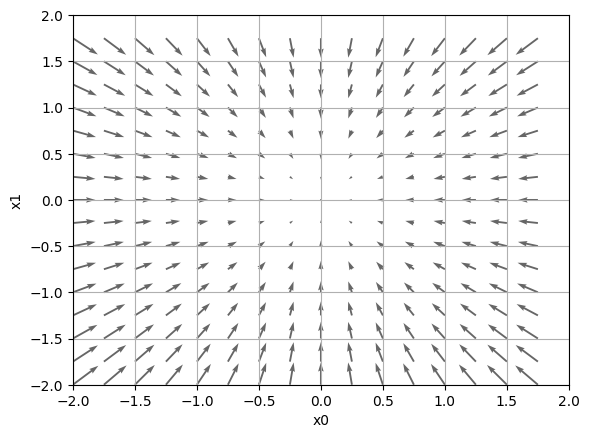

In [107]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 还原值

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


x0 = np.arange(-2, 2, 0.25)
x1 = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()
# print("X:", X)
# print("Y:", Y)

# numerical_gradient(function_2, np.array([-2, -2]))
grad = numerical_gradient(function_2, np.array([X, Y]))
# print("gradient:", grad)

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

这里我们画的是元素值为负梯度的向量。

严格地讲，梯度指示的方向是各点处的函数值减小最多的方向！

虽然梯度的方向并不一定指向最小值，但沿着它的方向能够最大限度地减小函数的值。

在梯度法中，函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是梯度法（gradient method）。

梯度法是解决机器学习中最优化问题的常用方法，特别是在神经网络的学习中经常被使用。

严格地讲，寻找最小值的梯度法称为梯度下降法（gradient descent method），寻找最大值的梯度法称为梯度上升法（gradient ascent method）。但是通过反转损失函数的符号，求最小值的问题和求最大值的问题会变成相同的问题，因此“下降”还是“上升”的差异本质上并不重要。一般来说，神经网络（深度学习）中，梯度法主要是指梯度下降法。

### 训练步骤

1. 步骤1（mini-batch）
从训练数据中随机选出一部分数据，这部分数据称为mini-batch。我们
的目标是减小mini-batch的损失函数的值。

2. 步骤2（计算梯度）
为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。
梯度表示损失函数的值减小最多的方向。

3. 步骤3（更新参数）
将权重参数沿梯度方向进行微小更新。

4. 步骤4（重复）

因为这里使用的数据是随机选择的mini batch数据，所以又称为随机梯度下降法 **SGD（stochastic gradient descent）**

### 2层神经网络的类



In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_laobel = True)
train_loss_list = []
# 参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)

    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 利用预先训练好的模型来进行测试：

In [77]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("./source/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
